In [5]:
from floquet_simulations.periodic_functions import Cosine
from floquet_simulations.hamiltonians import CreateHFGeneral
from floquet_simulations.plot_functions import *
from floquet_simulations.generate_gradients import ComputeAValsFromRequiredGradients, GetAValsFromBesselXVals
from numpy import pi
from scipy.special import jv
import math
from pathlib import Path
import matplotlib.pyplot as plt
from itertools import product
fontsize = 9
figsize = (6.4,5.3)
cm_unit = 1/2.54
PlotParams(fontsize=fontsize)
save_dir = Path().absolute().parent.parent.parent/"figures"/"black_hole_pres"


In [3]:
Ndiffs = 24
ymin = jv(0, 3.8316) 
print(ymin)
tunnellings = np.linspace(-ymin, ymin, Ndiffs) # for linear
tunnellings = tunnellings[::-1]
#get A vals to get the right gradient
omega = 25
# print(gradients)
drive_style = "alternating"

bessel_arguments = ComputeAValsFromRequiredGradients(tunnellings)

A_vals = GetAValsFromBesselXVals(bessel_arguments, omega, addition_type=drive_style, constant_shift="zero centre") # get actual shaking values
N= len(A_vals)
print(A_vals)

N_Avals = 19
A_vals = A_vals[:N_Avals]
# _, HF = CreateHFGeneral(Ndiffs+1,
#                         [int(i) for i in list(np.linspace(0,Ndiffs,Ndiffs+1))],
#                         [Cosine]*(Ndiffs+1),
#                         [[i,omega,0,0] for i in A_vals], #a, omega, phi onsite
#                         2*pi/omega,
#                         circle_boundary = 0
#                         )

# #make real
# if np.all(np.imag(HF))==0:
#     print("Ham is real")
#     HF =np.real(HF)

-0.40275939344110157
[-47.89493607  47.89493607 -37.59631606  43.64985019 -34.32349258
  40.87030974 -31.85271815  38.61378293 -29.75459258  36.63726158
 -27.8744503   34.8346989  -26.13529312  33.14780788 -24.4915072
  31.53964453 -22.91249274  29.98424069 -21.37572669  28.46149788
 -19.86292407  26.95460528 -18.35792356  25.44785606 -16.84545067]


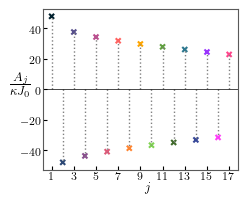

In [6]:
colours = ["#00202e", "#2c4875", "#58508d","#8a508f", "#bc5090","#de5a79","#ff6361","#ff8531","#ffa600", "#80d353","#609f3f","#406a2a", '#2E788F',"#374899","#9933FF", "#FF40F9","#FF458C"]
fig, ax = plt.subplots(figsize=(figsize[0]*cm_unit, figsize[1]*cm_unit))

n_avals_plot = 17
markerline, stemlines, baseline = ax.stem(range(n_avals_plot),
                                           -A_vals[:n_avals_plot], linefmt=':', markerfmt='x',
                                           basefmt=" "
)
stemlines.set_linewidth(1)
stemlines.set_color("0.5")

markerline.set_markersize(0)
ax.scatter(range(n_avals_plot), -A_vals[:n_avals_plot], marker = 'x', c=colours, s = 13)

plt.axhline(y=0, color='0', linestyle='-', lw=0.5)

ax.tick_params(axis="x", bottom=True, top=False, labelbottom=True, 
        labeltop=False, direction = "in", length = 3, pad=2)  
ax.tick_params(axis="y", left=True, right=False, labelleft=True, 
        labelright=False, direction = "in", length = 3, pad=2)  


ax.set_ylabel(r"$\frac{A_j}{\kappa J_0}$", rotation=0, fontsize=1.4*fontsize)
ax.yaxis.set_label_coords(-0.115,0.46)
ax.tick_params(axis='both', which='major', pad=1)
ax.set_xticks(np.arange(0,n_avals_plot,2))
ax.set_xlabel(r"$j$")
ax.xaxis.set_label_coords(0.53,-0.07)
xticks = np.arange(0,n_avals_plot,2)
ax.set_xticks(xticks)
ax.set_xticklabels([f"${i+1}$" for i in xticks])
# save_dir = Path().absolute().parent.parent.parent
fig.savefig(save_dir/"BH_a_vals_alternating_2D.png", format="png", bbox_inches="tight", pad_inches=0.01, dpi=600 )
# fig.savefig(save_dir/"a_vals_alternating.png", format="png", bbox_inches="tight", dpi=1080)
plt.show()

## tunnellings on diagonal

In [9]:
tunnellings_diagonal = [jv(0,(A_vals[i] - A_vals[i+1])/omega) for i in range(len(A_vals)-1)]
points_diagonal = [( i/2, (i+1)/2) for i in range(18)]
r_diagonal = [np.sqrt(x**2 + y**2) for x,y in points_diagonal]
r_axes = [i+0.5 for i in np.arange(0,11,1)]
A_vals_axes_indicies = [0,1,2,5,6,7,8,9,12,13,14, 15]
A_vals_axes = [A_vals[i] for i in A_vals_axes_indicies]
tunnellings_axes =  [jv(0,(A_vals_axes[i] - A_vals_axes[i+1])/omega) for i in range(len(A_vals_axes)-1)]

## plot all tunnelling links

In [10]:
# a_matrix = np.array([[15, 16, 15, 18, 17, 18],
#                      [14, 15, 14, 15, 16, 15],
#                      [13, 12, 13, 12, 13, 14]
#                      ])

a_matrix = [[ 0, 1, 2, 5, 6, 7, 8, 9,12,13],
                     [ 1, 2, 3, 4, 5, 8, 9,10,22,12],
                     [ 2, 3, 4, 5, 6, 7,10, 9,12,13],
                     [ 5, 4, 5, 6, 7, 8, 9,12,11,12],
                     [ 6, 5, 6, 7, 8, 9,10,11,12,13],
                     [ 7, 8, 7, 8, 9,10,11,12,13,14],
                     [ 8, 9,10, 9,10,11,12,13,14,15],
                     [ 9,10, 9,12,11,12,13,14,15,16],
                     [12,11,12,11,12,13,14,15,16,17],
                     [13,12,13,12,13,14,15,16,17,18],
                     [14,15,14,15,16,15,18,17,18],
                     [15,16,15,18,17,18]
                     ]

tunnelling_list = []
for i_y, i_x in product(range(1,12), range(10)):
    if i_y > i_x:
        
        try:
            tunnelling_right =  jv(0,(A_vals[a_matrix[i_y][i_x]] - A_vals[a_matrix[i_y][i_x+1]])/omega) 
            tunnelling_down =  jv(0,(A_vals[a_matrix[i_y][i_x]] - A_vals[a_matrix[i_y-1][i_x]])/omega) 

            r_right = np.sqrt( (i_x+0.5)**2 + (i_y)**2)
            r_down = np.sqrt( (i_x)**2 + (i_y-0.5)**2)

            tunnelling_list.append((tunnelling_right, r_right))
            tunnelling_list.append((tunnelling_down, r_down))
        except:
            print("An Exception occured")
        # print(a_matrix[i_y,i_x], a_matrix[i_y,i_x+1], (a_matrix[i_y, i_x] - a_matrix[i_y,i_x+1])/omega, tunnelling_right)

tunnelling_list = [(i,j) for i,j in tunnelling_list if j<11.3]

An Exception occured
An Exception occured
An Exception occured
An Exception occured
An Exception occured
An Exception occured
An Exception occured


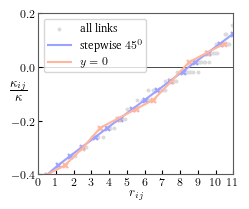

In [12]:
colour_axes = "#FFB69C"
colour_diagonal = "#9BA2FF"
tunnellings, r_vals = list(zip(*tunnelling_list))
fig, ax = plt.subplots(figsize=(figsize[0]*cm_unit, figsize[1]*cm_unit))
plt.axhline(y=0, color='0', linestyle='-', lw=0.5)
ax.scatter(r_vals, tunnellings, marker= '.',  c="0.86", s = 13, label="all links")

ax.plot(r_diagonal[:n_avals_plot-1], tunnellings_diagonal[:n_avals_plot-1],c=colour_diagonal, label=r"stepwise $45^0$")
ax.plot(r_axes, tunnellings_axes,c= colour_axes, label=r"$y=0$")

ax.scatter(r_diagonal[:n_avals_plot-1], tunnellings_diagonal[:n_avals_plot-1], marker = 'x', c=colour_diagonal, s = 13)
ax.scatter(r_axes, tunnellings_axes, marker = 'x', c=colour_axes, s = 13)


ax.tick_params(axis="x", bottom=True, top=False, labelbottom=True, 
        labeltop=False, direction = "in", length = 3, pad=2)  
ax.tick_params(axis="y", left=True, right=False, labelleft=True, 
        labelright=False, direction = "in", length = 3, pad=2)  

ax.set_ylabel(r"$\frac{\kappa_{ij}}{\kappa}$", rotation=0, fontsize=fontsize*1.4)
ax.yaxis.set_label_coords(-0.1,0.46)
ax.set_yticks([-0.4,-0.2,0,0.2])
ax.set_ylim([-0.4,0.2])

ax.set_xlabel(r"$r_{ij}$")
ax.xaxis.set_label_coords(0.5,-0.08)
ax.set_xticks(np.arange(0,12))
ax.set_xlim([0,11])

ax.legend()
fig.savefig(save_dir/"BH_linear_tunnelling_2D.png", format="png", bbox_inches="tight", pad_inches=0.01, dpi=600)
plt.show()